<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/SinFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

mpl.rcParams['lines.markersize'] = 0.5

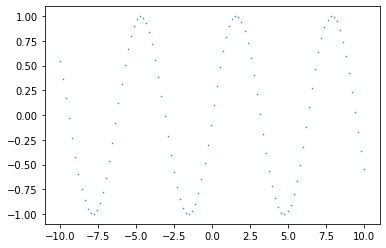

In [2]:
# pi/2 * 1 = 90
# pi/2 * 2 = 180
# pi/2 * 3 = 270
# pi/2 * 4 = 360
radians = np.linspace(-10, 10, 100)
data = np.sin(radians)
plt.scatter(radians, data)

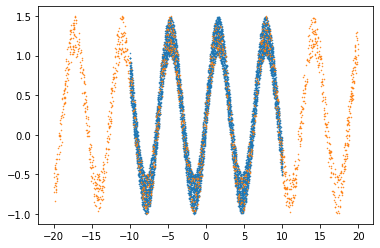

In [3]:
def get_input(start, end, num):
  x = start + np.random.random(num) * (end - start)
  y = np.sin(x) + np.random.random(num) * 0.5
  return x.reshape(-1, 1), y.reshape(-1, 1)

start = -10
end = 10
train_x, train_y = get_input(start, end, 8000)
test_x, test_y = get_input(start * 2, end * 2, 2000)

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

In [47]:
hidden_units = 32
time_steps = 4
input_dim = 1
model = models.Sequential()
model.add(layers.Input((time_steps, input_dim)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1))
model.compile(loss='mse', metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 4, 64)             128       
                                                                 
 dense_34 (Dense)            (None, 4, 32)             2080      
                                                                 
 dense_35 (Dense)            (None, 4, 16)             528       
                                                                 
 dense_36 (Dense)            (None, 4, 1)              17        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [48]:
epochs = 100
history = model.fit(train_x, train_y, epochs=epochs, verbose=0)
test_loss, test_acc = model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 1ms/step - loss: 0.5333 - acc: 0.0000e+00


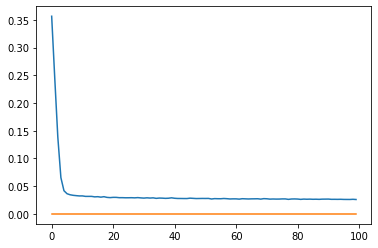

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

In [50]:
test_loss, test_acc = model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 1ms/step - loss: 0.5333 - acc: 0.0000e+00


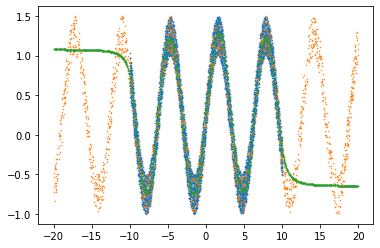

In [51]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

predicted_y = model.predict(test_x)
plt.scatter(test_x, predicted_y)